# Entropy, conditional entropy, and mutual information

* js (jserences@ucsd.edu), June 2022 for CSHL

Overview:
* In this tutorial, we will learn how to describe the information that is shared between two variables (mutual information). In other words, how much is uncertainty reduced about variable 1 after we've measured variable 2? 

* These concepts were initially developed in communication theory to describe the efficacy of transmitting signals over a noisy medium (like a noisy telephone line). For example, suppose that we want to know how good a communication channel is, or its effeciency in reliably relaying a message from point A (a 'sender') to point B (a 'reciever').

* Basically this is just like asking, "we know how good the signal is at A, and we recieved the message at B - how much information about A is still in the received signal B?". 

* So that is the general gist of it, but this metric is super relevant in many fields of neuroscience, psychology, engeneering, etc (and there are much fancier multivariate versions that we won't cover here). For example, in neuroscience we're dealing with a series of communication channels that are corrupted by noise (e.g. info relayed via synapses). We can then ask all kinds of questions like how much information from neuron A effectively propogates to neuron B? Or does attention/learning increase the mutual information between neurons? 

* Importantly, we can apply these tools to any combination of variables: two continuous variables, two discrete variables, one continuous and one discrete, etc. 

* Note: this also comes up in machine learning sometimes, where you can use mutual information to select the most informative features in a training data set (sklearn has some great tools for this)

* A few notes before we get started. First, we're going to be talking a lot about **uncertainty** and **uncertainty reduction**. While this is basically complementary to talking about certainty and an increase in certainty, we'll deal with the former terminology as it is embedded in some of the concepts that we'll discuss. 

* Second, we'll be dealing with variability in data, and how we can either attribute that variability in the data to 'noise' or to 'signals'. I.e. does the variability in one variable systematically change with the variability in another? 

<div class="alert alert-info">
A lot of people think, after first hearing about mutual information, "why not just correlate the variables using a normal r-value?". There are a few answers to this, but the simplest is this: correlation assumes a linear relationship (or, in more complex forms, you have to assume some relationship) between variables. Mutual information does not, and can generally capture any form of linear or non-linear relationship between two variables. This makes it a very powerful and general purpose metric.
</div>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# also define the default font we'll use for figures.
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

# then set the figure attributes
plt.rc('font', **font)

PART II: Entropy as a measure of variability

* Shannon Entropy is related to the variability of data, but is more specifically defined as the average uncertainty in a set of measurements 
* Consider coin tosses - lets say we have a balanced coin, and we flip it once. We can represent the outcome of a single toss as a 0 or a 1 (a head or a tail), and this has an entropy (uncertainty) of 1 bit. In other words, we would reduce our uncertainty completely after we observed the outcome, and that would correspond to a reduction of 1 bit. 
    * By extension, if we flipped the coin twice, then the entropy would be 2 bits (00, 01, 10, or 11) because we would reduce our uncertainty by 2 bits after we observed the outcome. 

* To keep with the coin analogy...when the coin is balanced and heads and tails are equally likely, then the entropy is highest because uncertainty is maximized and flipping the coin will give you 1 bit of information.  
* To see why entropy is maximized in this situation, consider a biased coin  that comes up heads 60% the time. 
    * In this case, we could predict the outcome of the coin flip better than chance simply by going with our prior of 'heads'. Thus, the entropy assoicated with a biased coin is less than the entropy associated with the unbiased coin, because the reduction in uncertainty is lower with the biased coin than with the unbaised coin. 
    * We learn less after flipping the biased coin than we do when we flip the unbiased coin. 
* This example brings up an important point: entropy as a measure of uncertainty is maximized when all possible outcomes are equally likely because you have no prior info upon which to make an educated guess about the outcome (i.e. a uniform distribution over the span of possible outcomes has the highest entropy). 

## Figure out the entropy of a measurement in bits (the most common metric)
* We can use the log2 function, referred to as the binary logarithm and the inverse function of 2^N. 
* The log2(n) is the power to which the number 2 must be raised to obtain the value n. 
* Lets go back to our coin flip example with a fair coin. Suppose you flipped the coin once - the entropy would be 1 bit because there are two possible outcomes...i.e., you can represent the outcome with 1 bit, or (0,1)
*  If you flipped the coin twice you'd have 4 possible outcomes (00,10,01,11), or three times you'd have 8 possible outcomes (000, 001...etc). So you'd need 2 and 3 bits, respectively, to encode all possible outcomes

In [2]:
print(np.log2(2)) # log2(n) or 2^x = n? ...x = 1
print(np.log2(4)) # or 2^x = n, x = 2
print(np.log2(8)) # or 2^x = n, x = 3

1.0
2.0
3.0


## To see the general shape of the function, plot out log2(x:y)

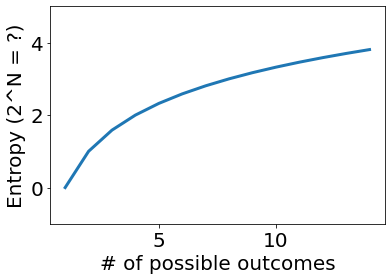

In [3]:
# why am i going from 1,15 instead of our usual 0 based counting?
plt.plot(np.arange(1,15), np.log2(np.arange(1,15)), linewidth=3)
plt.ylim([-1,5])
plt.ylabel('Entropy (2^N = ?)')
plt.xlabel('# of possible outcomes')
plt.show()
# note that log2(0) == -inf, and that log2(1)==0

## Going back to the above notion that entropy is maximized when the outcome is completely uncertain (e.g. a fair coin), then we can start to develop an intuition about expressing entropy in terms of the probability that some event will occur, denoted P(X). 
* Lets take a more complex case - lets say that we have a slot machine that has one wheel on it and the wheel can take one of N states. 
* Considering just the first wheel, the possible outcomes are {x1....xn}, and if each outcome is equally likely, then p(xi)= 1/n.  
* So, for example, if n = 16, then the total entropy of the wheel can be represented  by 4 bits of information (or there is 4 bits of info to be gained by spinning the wheel and observing the outcome). 

In [4]:
n = 16
-np.log2(1/n)  
#why negative when dealing with probabilities? log2(1)-log2(n), log2(1) = 0.0, so 0-log2(n) is neg

4.0

## What we'd like though is a way to assess the *average* uncertainty of a particular outcome across all possible outcomes. How would you do that? 
* You'd take the uncertainty of each outcome (-log2(p(xi)) and weight it by the probability that the event will actually  occur, like this (where entropy is denoted, by convention, as H):

`H = -( (1/n) * np.log2(1/n) )` where `n` is the number of possible outcomes

* Note that the "average" uncertainty is achieved by weighting each with the probability that the event occurs (see the commented out code below for another way of doing this that might make more sense...but use the formula in the uncommented code when actually computing). 

In [5]:
# H = -sum_over_all_i( p(xi) * log2(p(xi)) )
n = 16
H = 0
for i in np.arange(n):
    H += -( (1/n) * np.log2(1/n) )

print(H)

# note: in this case of equal probability outcomes
# you could also do this:
# H = 0
# for i in np.arange(n):
#     H += -np.log2(1/n)

# print(H/n)  # just normalize here...

4.0


## What about when all events are not equally likely?

3.8279550259738846


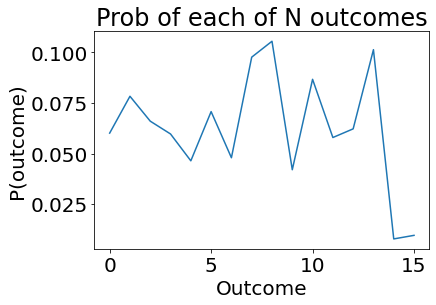

In [6]:
np.random.seed(0)

# Remember that with 16 possible equally likely outcomes
# we should have an entropy of 4 - with unequal probs
# we should an entropy of less than 4...
n = 16

# pick some random values to use for p(x)
px = np.random.rand(n)
px /= np.sum(px) # convert the random numbers to probabilities

# loop way...
# H = 0
# for i in np.arange(n):
#     H += -( px[i] * np.log2(px[i]) )

# numpy way - element-by-element multiplication
H = -np.sum(px * np.log2(px))

print(H)

plt.plot(np.arange(n),px)
plt.xlabel('Outcome')
plt.ylabel('P(outcome)')
plt.title('Prob of each of N outcomes')
plt.show()

<div class="alert alert-info">
Note that the entropy is lower because we've moved away from the point where everything is maximally unpredictable (i.e. a uniform distribution). This demonstrates a principle that relates probability distributions to entropy: uniform probability distributions have maximum entropy, and non-uniform distributions will generally have less entropy because some outcomes are more likely than others so you learn less by making a measurement.
</div> 

SUMMARY UP TILL NOW
* Entropy is a measure of uncertainty, and as uncertainty goes up (and is maximized when all outcomes are equally likely) then the information gained by making a measurement goes up. 
* So if you know the oucome in advance (e.g. a coin with two heads) then p(tails) = 0 and there is no uncertainty, entropy is 0, and there is no reduction in uncertainty to be gained by flipping the coin at all. 
* If you have a fair coin, then p(head)==p(tail) and entropy will be maximum and you will maximally reduce your uncertainty by making the measurement (in this case, you will fully disambiguate the outcome, gaining 1 bit of information where the total uncertainty is 1 bit).

## Mutual information (MI). 

* MI is a measure of how much knowing  about 1 variable tells you about the state of another variable. Putting aside entropy and measures of uncertainty/variance for a minute, here is the  intuition. 
    * Suppose you have two variables that are completely unrelated to each other: measuring one variable will tell you nothing about the state of the other variable. 
    * In contrast, if you have two variables that are perfectly related, then measuring one variable will tell you everything about the state of the other. 
    * In this special (unusual) case, the mutual information will be equal to the entropy of either variable alone (that is: the information gained by measuring one variable will be equal to the information gained by measuring either - i.e., if they are perfectly related then you only need to measure one of them to know everything about the other)
 
To put this back in terms of entropy: lets say we have two variables, X and Y. If we want to assess the MI between X and Y, then we need to know the following difference score:

`(total entropy of X) - (entropy of X given that we know Y)` 

In other words, how much is uncertainty about X REDUCED when we measure Y? That is the MI between the two variables. And it leads to one common formulation of MI:

`MI = H(X) - H(X|Y)`

where `H(X)` is the entropy of `X`, and `H(X|Y)` is the conditional entropy of `X` given that we've measured `Y` (it is the average entropy of `X` across all values of `Y`)

In [7]:
# seed rnd num gen
np.random.seed(0)

# two discrete random arrays filled with 0's and 1's
N = 1000   # number of data points
x = np.round(np.random.rand(N))   # our x
y = np.round(np.random.rand(N))   # our y

# introduce some relationship bewteen x,y
# quick hack will replace some percentage of 
# y with values in x to determine how related they are...
# this is clunky, but quick :) 
p = .95     # how many values in x,y will be identical?
ind = int(p*N)

# replace existing values in y with values in x
y[:ind] = x[:ind]

# event probabilities for x
px = np.zeros(2)
px[0] = np.sum(x) / N   # probability that x==1
px[1] = 1 - px[0]       # prob that x==0

# entropy of x
Hx = -np.sum( px * np.log2(px) )
print(f'Entropy of X: {Hx}')

# then compute average conditional entropy of x given y (Hxy).
# 1) Compute the entropy of X given each possible value of Y
# 2) Multiply H(X|Yi) with the probability of each Y (i.e. p(yi))
# 3) Sum H(X|Yi) over all i

# initialize Hxy
Hxy = 0

# loop over unique elements of y, in this case 0,1
for i in np.arange(2): 
    
    # probability that y==y(i) (prob of each y)
    py = np.sum(y==i) / N

    # then loop over all possible x's to compute entropy of x at each y
    tmp=0
    for j in np.arange(2):
        px_y = np.sum( (x==j) & (y==i) ) / np.sum( y==i )    # e.g. prob x==1 when y==0
        tmp += -( px_y * np.log2(px_y) )                     # entropy      
        
    # then tally up entropy of x given each specific y multiplied by the probability of that y (py) - this will 
    # give you the average conditional entropy...
    Hxy += (py * tmp)

# then we have everything we need to compute MI
MI = Hx - Hxy

print(f'Mutual Information between X,Y: {MI}')

Entropy of X: 0.9991659615315873
Mutual Information between X,Y: 0.8149294036605923


## And then the more compact way using sklearn

In [8]:
from sklearn.metrics import mutual_info_score
from math import isclose

# sklearn implmentation (note that it uses natural log,
# but we can convert to bits by multiplying by log2(e))
sklean_MI = mutual_info_score(x,y) * np.log2(np.e)

print(f'Mutual Information between X,Y: {sklean_MI}')

# check our answer from above against sklearn...
assert( isclose( MI,sklean_MI ) )
print('whew...we did it right')

Mutual Information between X,Y: 0.8149294036605925
whew...we did it right


## Now lets try a more complicated example where we have one discrete variable (like a categorical experimental condition) and one continuous variable (e.g. timeseries of activity)
* This often comes up in experiments where you have a set of discrete stimuli and then a continuous output measure (e.g. LFP power, spike rate over a time window, clinical outcomes on a survey, housing prices, etc)
    * For comparison, with our coin tosses, you can get the PDF by sum(heads)/total_tosses...
    * But for a continuous metric where you have all unique values, this doesn't work (i.e. if each value happens once and only once then how do you compute the likelihood of observing that value?
    * To solve this problem, we need to generate an estimate of the PDF based on our samples of the continuous data
    * Common approaches are to sort the data into bins (histogram) to approximate the PDF, or to use Kernel Density Estimation

## Set up our variables - one discrete and one continuous
* lets assume that our data came from an experiment where we have 4 different experimental conditions and we record some continuous DV in each condition (e.g. spike rates, bold response, stock market price, clinical outcome measure, ...whatever)

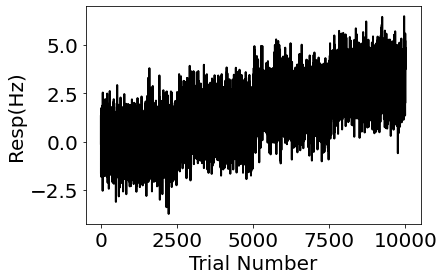

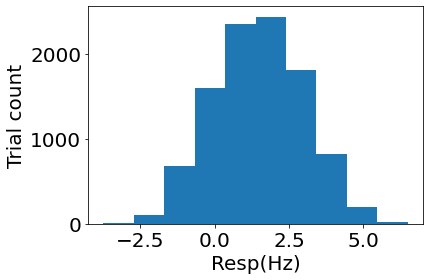

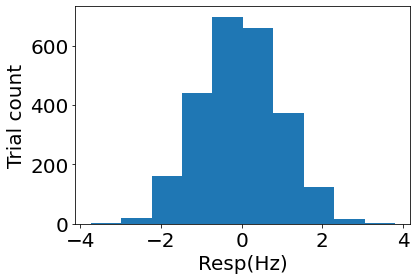

In [9]:
# number of samples in our experiment
N = 10000

# Generate a list of labels for each condition
num_conds = 4
conds = np.repeat(np.arange(4), N/num_conds) # div by num_stims to keep output length constant

# Now generate our list of continuous spike rates in response to each stimulus
# Set it up so that there is a differential response to each of the 4 stims (i.e. MI>0)
cond_means = [0,1,2,3] # mean of response in each condition

# try these to increase MI
# cond_means = [0,4,8,12] # mean of response in each condition
# cond_means = [0,10,20,30] # mean of response in each condition
# cond_means = [0,100,200,300] # mean of response in each condition

cond_std = [1,1,1,1]   # std of response in each condition
# cond_std = [.15,.15,.15,.15]   # std of response in each condition

resp=[]
for i in np.arange(num_conds):
    resp = np.hstack((resp, ((np.random.randn(int(N/num_conds)) * cond_std[i]) + cond_means[i])))
    
plt.plot(np.arange(N), resp, 'k', linewidth=2)
plt.xlabel('Trial Number')
plt.ylabel('Resp(Hz)')
plt.show()

# also show as a histogram to get a feel for the distribution
num_bins = 10 # change this! you'll get a feel for why using histograms for estimating PDFs is tricky
plt.hist(resp, bins=num_bins)
plt.xlabel('Resp(Hz)')
plt.ylabel('Trial count')
plt.show()

# also show as a histogram for one condition...
num_bins = 10 # change this! you'll get a feel for why using histograms for estimating PDFs is tricky
plt.hist(resp[conds==0], bins=num_bins)
plt.xlabel('Resp(Hz)')
plt.ylabel('Trial count')
plt.show()

### Now use binning to estimate a PDF for the continuous variable
* Create N bins, sort the continuous data into the bins, then compute mutual information!

In [10]:
# how many bins? 
nbins = 20

# first bin the data using histogram. 
# however, just save the edges of each bin
_, edges = np.histogram(resp, bins=nbins)

# then sort all of the continuous responses in bins
# use numpy digitize...you pass in the continuous 
# response and the bin edges and it will sort each 
# response into the appropriate bin
bin_y = np.digitize(resp, edges)

# then compute MI! note that stims is a N x 1 array (2D)
MI = mutual_info_score(conds, bin_y) * np.log2(np.e)

print(MI)

0.5813090624205294


## How accurate are we? 
* To check, always good to think about the theoretical upper limit on mutual information
* Remember the formula: MI = Hx - Hxy
* So the max value of MI is Hx...if knowing y is totally diagnostic of x, then the entropy of x given y (Hxy) will be 0, and MI will equal Hx.
* So you can figure out Hx, and then go back to the simulation above and either increase the difference between the means (cond_means), or decrease the std (cond_std). In either case, you will reduce overlap between the conditions and knowing y will become more predictive of the value of x (i.e. if you measure y, you'll be able to better guess what condition that data came from). As you do this, MI should approach Hx...
* Another intuition: the more overlap between the response distributions in each condition, the lower MI (because knowing y will give you ambiguous information about the value of x). However, as the overlap goes down, MI will go up, and when there is no overlap, the MI == Hx. 

In [11]:
# how accurate are we? 
# first figure out Hx
# easy cause there are 4 equally likely conditions
print(f'Entropy of x (conds): {np.log2(4)}')
print(f'Mutual Information: {MI}')

Entropy of x (conds): 2.0
Mutual Information: 0.5813090624205294


## Normalized MI
* Since the upper limit of MI is Hx, you can convert the unit of MI from bits to a proportion of total entropy (or put another way, as a proportion of the upper bound of information)
* Normalized MI is NMI = MI/Hx, which has a theoretical upper limit of 1 and a lower limit of 0

In [12]:
NMI = MI/np.log2(4)
print('Normalized MI:', NMI)

Normalized MI: 0.2906545312102647
